# ACLO Notebook
Goal: load raw check-ins → build daily dataset → quick sanity checks


In [1]:
#Install packages for the project
#!pip install pandas numpy seaborn matplotlib scikit-learn scipy networkx 

Import the required modules

In [2]:
# Import the required building blocks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn import preprocessing
from scipy import stats

# Number of visits per time of day for all of the Check-in-time data



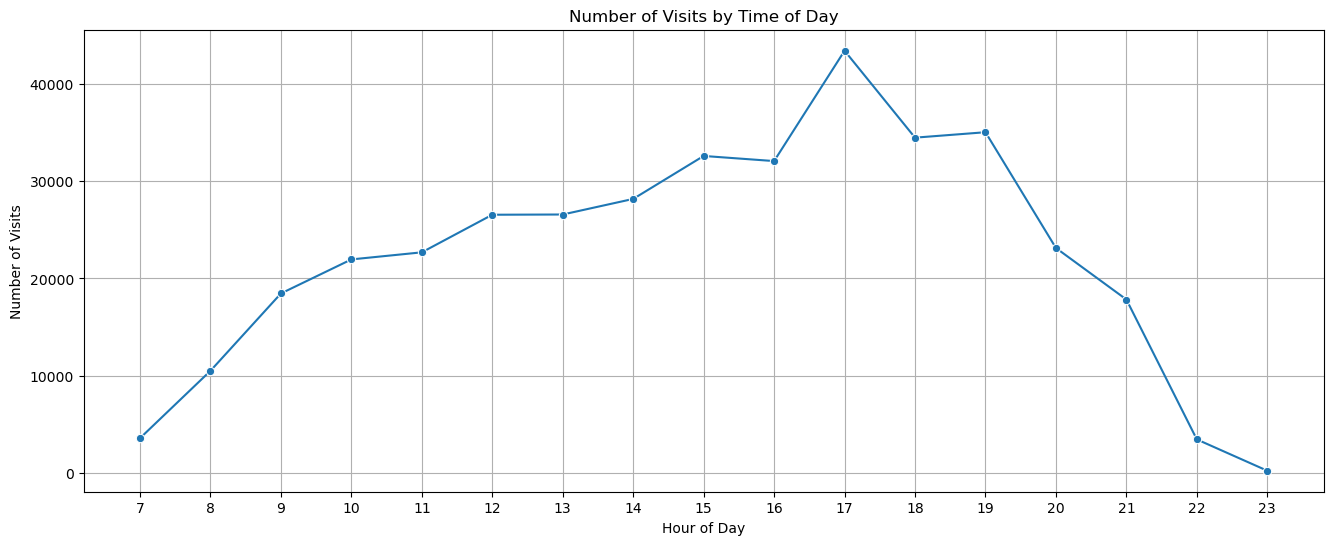

In [8]:

# Read the data from the specified file
df_visits = pd.read_csv('data/Check-in times/Check-in-times_sheet_2017-2021 kaikki checkin timet yhes.csv')

# Parse the check-in time column (assuming it's named like in your previous df)
# Find the column that contains 'date' in its name (case-insensitive)
time_col = [col for col in df_visits.columns if 'date' in col.lower()][0]

# Convert to datetime and extract hour
df_visits['hour'] = pd.to_datetime(df_visits[time_col], errors='coerce').dt.hour

# Count visits per hour
visits_per_hour = df_visits['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(16,6))
sns.lineplot(x=visits_per_hour.index, y=visits_per_hour.values, marker='o')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Visits')
plt.title('Number of Visits by Time of Day')
plt.xticks(range(7, 24))
plt.grid(True)
plt.show()

# Cardholder data

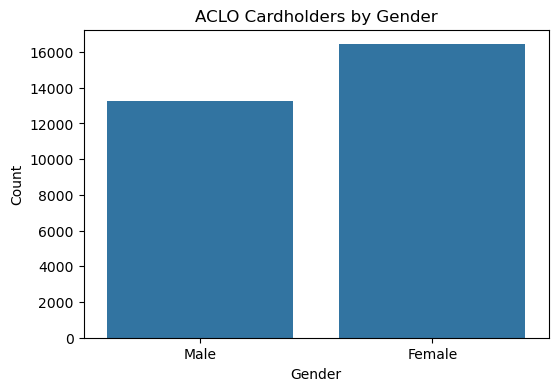

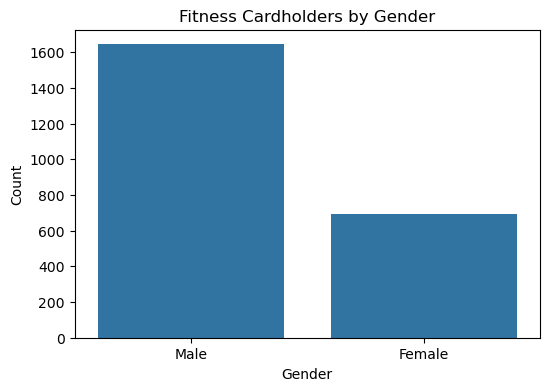

In [21]:
cardholders_full = pd.read_csv('data/Cardholders/Kaikki membership tyypit vuodet 2020-2022.csv')
cardholders_full.describe()

# Separate ACLO and Fitness cardholders
is_aclo = cardholders_full['Description'].str.contains('ACLO', case=False, na=False)
is_fitness = cardholders_full['Description'].str.contains('Fitness', case=False, na=False)

aclo_cardholders = cardholders_full[is_aclo]
fitness_cardholders = cardholders_full[is_fitness]

# Plot count by gender for ACLO cardholders
aclo_gender_counts = pd.Series({
    'Male': aclo_cardholders['Gender Male'].notnull().sum(),
    'Female': aclo_cardholders['Gender Female'].notnull().sum()
})
plt.figure(figsize=(6,4))
sns.barplot(x=aclo_gender_counts.index, y=aclo_gender_counts.values)
plt.title('ACLO Cardholders by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()

# Plot count by gender for Fitness cardholders
fitness_gender_counts = pd.Series({
    'Male': fitness_cardholders['Gender Male'].notnull().sum(),
    'Female': fitness_cardholders['Gender Female'].notnull().sum()
})
plt.figure(figsize=(6,4))
sns.barplot(x=fitness_gender_counts.index, y=fitness_gender_counts.values)
plt.title('Fitness Cardholders by Gender')
plt.ylabel('Count')
plt.xlabel('Gender')
plt.show()



# Correlation Matrix

,Klant nr,Unnamed: 5
Klant nr,1.0,NaN
Unnamed: 5,NaN,NaN


# Reading the source file

In [5]:
#checking the data types
df.dtypes
print(df.columns.tolist())


['Klant nr', 'Lid id ', 'Gender', 'Subscription visit', '\nCheck-in date', 'Unnamed: 5']
